## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

/home/werteray/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


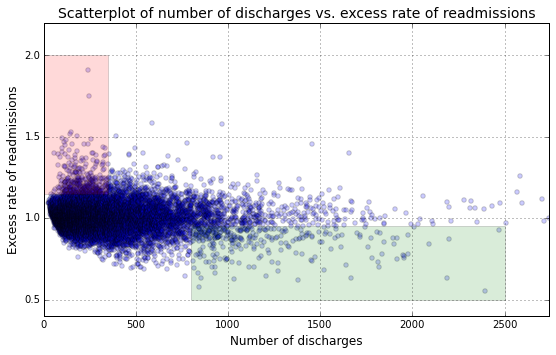

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

### Hypothesis test

- ERR = excess readmission ratio 
- Null hypothesis: ERR for hospitals with < 300 discharges = ERR for hospitals with >= 300 discharges 
- Alternative hypothesis: ERR's not equal 
- Appropriate test: two tailed t-test, unequal variance  
- $\alpha$ = .01

First prep the data by splitting into two groups, plotting and showing some basic descriptive statistics

In [ ]:
cut = 300
low = df[df['Number of Discharges']<cut]['Excess Readmission Ratio'].dropna()
high = df[df['Number of Discharges']>=cut]['Excess Readmission Ratio'].dropna()


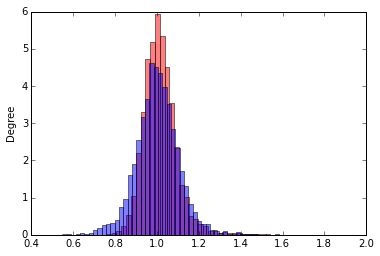

In [133]:
cut=300
df[df['Number of Discharges']<cut]['Excess Readmission Ratio'].plot(kind='hist',bins=50,color='r',alpha=.5,normed=True)
df[df['Number of Discharges']>=cut]['Excess Readmission Ratio'].plot(kind='hist',bins=50,color='b',alpha=.5,normed=True)

In [135]:

stats.ttest_ind(low,high,equal_var=False)
low.mean()-high.mean()
len(low), len(high)
low.std(), high.std()

(0.082471456514955924, 0.10110887613836193)

In [9]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258,07/01/2010,06/30/2013


In [14]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7,1.909500,32.800000,28.000000,879.000000


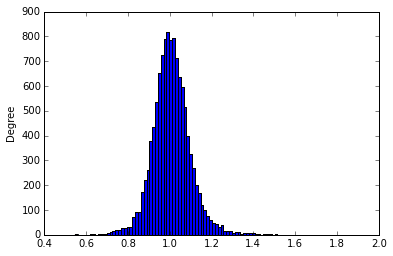

In [15]:
clean_hospital_read_df['Excess Readmission Ratio'].plot(kind='hist',bins=100)

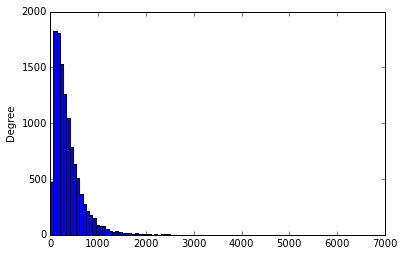

In [17]:
clean_hospital_read_df['Number of Discharges'].plot(kind='hist',bins=100)

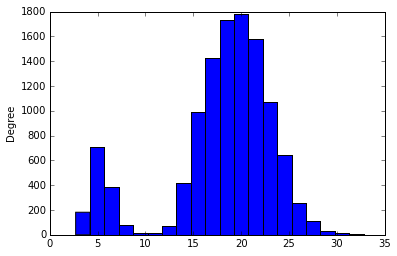

In [18]:
clean_hospital_read_df['Predicted Readmission Rate'].plot(kind='hist',bins=20)

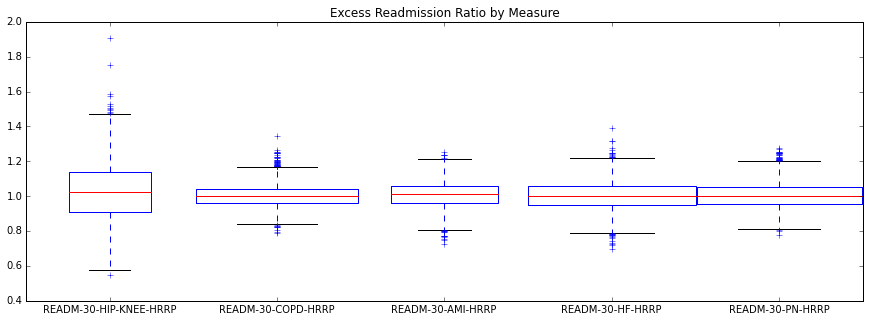

In [50]:
df = clean_hospital_read_df
measures=df['Measure Name'].unique()
data = []
widths = []
for m in measures:
    data.append([df[df['Measure Name']==m]['Excess Readmission Ratio']])
    widths.append(len(df[df['Measure Name']==m]))

widths = [float(w)/max(widths) for w in widths]
    
plt.figure(figsize=(15,5))
plt.boxplot(data,labels=measures,widths=widths)
plt.title('Excess Readmission Ratio by Measure')
plt.show()

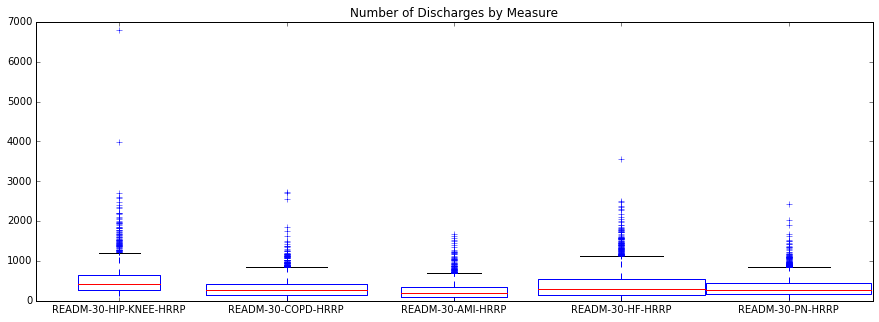

In [51]:
df = clean_hospital_read_df
measures=df['Measure Name'].unique()
data = []
widths = []
for m in measures:
    data.append([df[df['Measure Name']==m]['Number of Discharges']])
    widths.append(len(df[df['Measure Name']==m]))

widths = [float(w)/max(widths) for w in widths]
    
plt.figure(figsize=(15,5))
plt.boxplot(data,labels=measures,widths=widths)
plt.title('Number of Discharges by Measure')
plt.show()

In [71]:
from pandas.stats.api import ols

In [110]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True)
    Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int, optional
        Axis can equal None (ravel array first), or an integer (the axis
        over which to operate on a and b).
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        population variance [2]_.
    
        .. versionadded:: 0.11.0
  